![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resources

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read `Salaries.csv` as a dataframe called `sal`.**

In [2]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [52]:
sal.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148648,148649,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [10]:
# Your Code Here
sal.describe().loc['mean', 'BasePay']

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [13]:
# Your Code Here
sal.describe()['BasePay'].loc[['min', 'max']]

min      -166.01
max    319275.01
Name: BasePay, dtype: float64

In [ ]:
# Your Code Here


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [27]:
# Your Code Here
sal.describe()['OvertimePay'].loc[['min', 'max', 'mean']]

min         -0.010000
max     245131.880000
mean      5066.059886
Name: OvertimePay, dtype: float64

In [28]:
# Your Code Here

5066.059886444622

In [ ]:
# Your Code Here

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [43]:
# Your Code Here
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL'].JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [33]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your Code Here
sal[sal['EmployeeName'] == 'GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [41]:
# Your Code Here
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL'].TotalPayBenefits


24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [46]:
# Your Code Here
highest_paid = sal['TotalPayBenefits'].idxmax()
sal.loc[highest_paid]['EmployeeName']

'NATHANIEL FORD'

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [49]:
# Your Code Here
lowest_paid = sal['TotalPayBenefits'].idxmin()
sal.loc[lowest_paid]['EmployeeName']

'Joe Lopez'

### His benefits were negative

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [54]:
# Your Code Here
sal.groupby('Year')['BasePay'].sum()

Year
2011    2.299566e+09
2012    2.405835e+09
2013    2.576381e+09
2014    2.537369e+09
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [60]:
# Your Code Here
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [64]:
# Your Code Here
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [69]:
# Your Code Here
sum(sal[sal['Year'] == 2013].JobTitle.value_counts() == 1)

202

**How many people have the word Chief in their job title?**

In [74]:
# Your Code Here
def func(str):
  return 'chief' in str.lower()
sal['JobTitle'].apply(func).sum()


627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

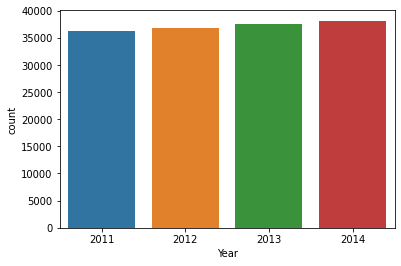

In [75]:
sns.countplot(x = "Year", data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

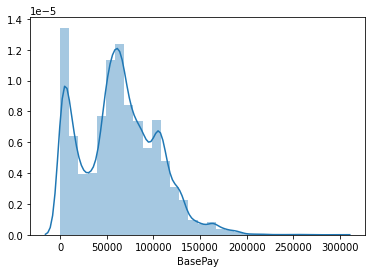

In [76]:
sns.distplot(sal[sal["Year"] == 2011]["BasePay"], bins = 30);

**How about other Year**

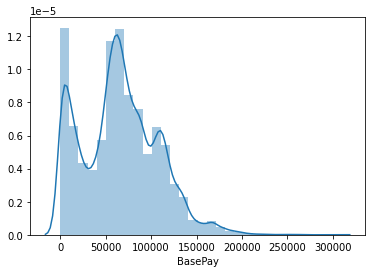

In [81]:
# Your Code Here for 2012
sns.distplot(sal[sal["Year"] == 2012]["BasePay"], bins = 30);

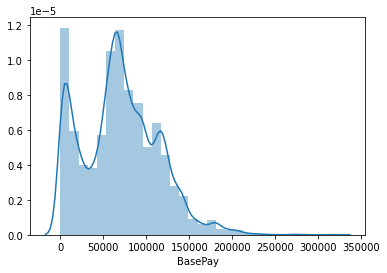

In [78]:
# Your Code Here for 2013
sns.distplot(sal[sal["Year"] == 2013]["BasePay"], bins = 30);

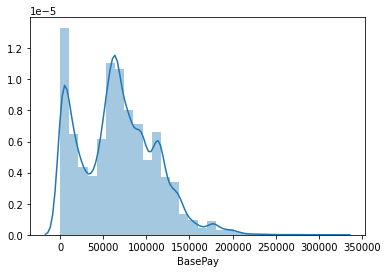

In [79]:
# Your Code Here for 2014
sns.distplot(sal[sal["Year"] == 2014]["BasePay"], bins = 30);

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

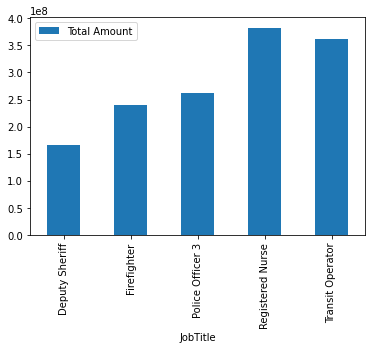

In [132]:
# Your Code Here
sal2 = sal.groupby('JobTitle')['BasePay'].sum().reset_index(name ='Total Amount').sort_values(by=['Total Amount'], ascending=False).head(5)
sal2.groupby('JobTitle').sum().plot(kind='bar')


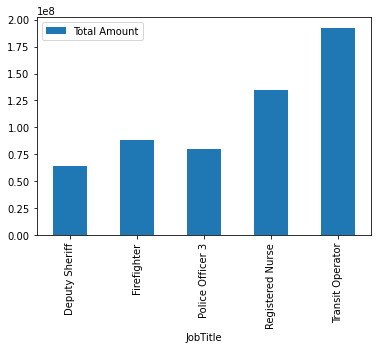

In [133]:
# Your Code Here
sal2 = sal.groupby('JobTitle')['Benefits'].sum().reset_index(name ='Total Amount').sort_values(by=['Total Amount'], ascending=False).head(5)
sal2.groupby('JobTitle').sum().plot(kind='bar')

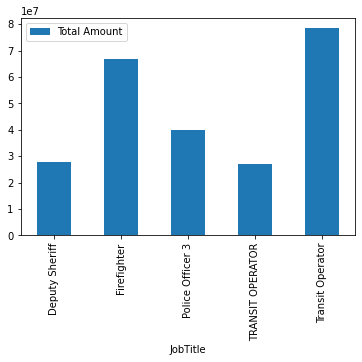

In [134]:
sal2 = sal.groupby('JobTitle')['OvertimePay'].sum().reset_index(name ='Total Amount').sort_values(by=['Total Amount'], ascending=False).head(5)
sal2.groupby('JobTitle').sum().plot(kind='bar')

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [135]:
# Your Code Here
sal['title_len'] = sal['JobTitle'].apply(len)
sal[['TotalPayBenefits', 'title_len']].corr()

,TotalPayBenefits,title_len
TotalPayBenefits,1.000000,-0.036878
title_len,-0.036878,1.000000


# Great Job!